<a href="https://colab.research.google.com/github/vlad-uve/CAE-MNIST/blob/main/notebooks/CAE_final_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 CAE Final Results — Parameter Count Comparison

This notebook aggregates and visualizes the total number of trainable parameters for all Convolutional Autoencoder (CAE) models developed throughout the MNIST reconstruction experiments.

This helps justify the selection of the **trade-off model**, which was designed to balance reconstruction performance and computational efficiency.


## 1. 🔧 Setup

In [1]:
from getpass import getpass

# get repo url
token = getpass("Paste your GitHub token")
user_name = 'vlad-uve'
repo_name = 'CAE-MNIST'
repo_url = f"https://{token}@github.com/{user_name}/{repo_name}.git"

# clone the repo
!git config --global user.email "vladislav.yushkevich.uve@gmail.com"
!git config --global user.name "vlad_uve"
!git clone {repo_url}

# append system path
import sys
sys.path.append('/content/CAE-MNIST')

Paste your GitHub token··········
Cloning into 'CAE-MNIST'...
remote: Enumerating objects: 1012, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 1012 (delta 85), reused 70 (delta 44), pack-reused 878 (from 1)
Receiving objects: 100% (1012/1012), 26.60 MiB | 24.99 MiB/s, done.
Resolving deltas: 100% (559/559), done.


In [6]:
# OS utilities
import os

# PyTorch
import torch

# Plotting
import matplotlib.pyplot as plt

## 2. 📥 Import Parameter Count Files

In [4]:
# Directory to search
base_path = "/content/CAE-MNIST"
found_param_files = []

# Traverse and collect file paths ending with 'param_counts.pth'
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith("param_counts.pth"):
            found_param_files.append(os.path.join(root, file))

# Display found files
for path in found_param_files:
    print(path)

/content/CAE-MNIST/outputs/experiment_3_files/experiment_3_param_counts.pth
/content/CAE-MNIST/outputs/base_model_files/base_param_counts.pth
/content/CAE-MNIST/outputs/tradeoff_model_files/tradeoff_param_counts.pth
/content/CAE-MNIST/outputs/experiment_5_files/experiment_5_param_counts.pth
/content/CAE-MNIST/outputs/experiment_4_files/experiment_4_param_counts.pth
/content/CAE-MNIST/outputs/experiment_1_files/experiment_1_param_counts.pth
/content/CAE-MNIST/outputs/experiment_2_files/experiment_2_param_counts.pth


In [13]:
# Load parameter count dictionaries into a list
param_counts_list=[]

for path in found_param_files:
    file = torch.load(f'{path}')
    param_counts_list.append(file)


param_counts_list

[{'experiment_3_model_1': 137825},
 {'base_model': 137441},
 {'tradeoff_model': 85649},
 {'experiment_5_model_1': 137441,
  'experiment_5_model_2': 137441,
  'experiment_5_model_3': 137441},
 {'experiment_4_model_1': 190049, 'experiment_4_model_2': 135841},
 {'experiment_1_model_1': 68769, 'experiment_1_model_2': 347489},
 {'experiment_2_model_1': 75971,
  'experiment_2_model_2': 88265,
  'experiment_2_model_3': 203009}]

## 3. 📊 Plotting Parameter Counts

In [17]:
# Prepare color mappings for each experiment
color_map = {}
palette = plt.get_cmap('tab20').colors
colors_by_experiment = {
    'experiment_1': palette[0],
    'experiment_2': palette[1],
    'experiment_3': palette[2],
    'experiment_4': palette[3],
    'experiment_5': palette[4],
    'base_model': palette[6],
    'tradeoff_model' : palette[8]
}

# Flatten into one dictionary with experiment labels
flat_dict = {}
for d in param_counts_list:
    for k, v in d.items():
        flat_dict[k] = v
        exp_key = k.split('_')[0] + '_' + k.split('_')[1]  # e.g., "experiment_1"
        color_map[k] = colors_by_experiment.get(exp_key, 'gray')

# Sort models by parameter count
sorted_items = sorted(flat_dict.items(), key=lambda item: item[1])
model_names, param_counts = zip(*sorted_items)
bar_colors = [color_map[name] for name in model_names]

In [21]:
# Create directory for the notbook's outputs
output_dir = '/content/CAE-MNIST/outputs/final_results_files'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"✅ Directory created at: {output_dir}")
else:
    print(f"📁 Directory already exists at: {output_dir}")

✅ Directory created at: /content/CAE-MNIST/outputs/final_results_files


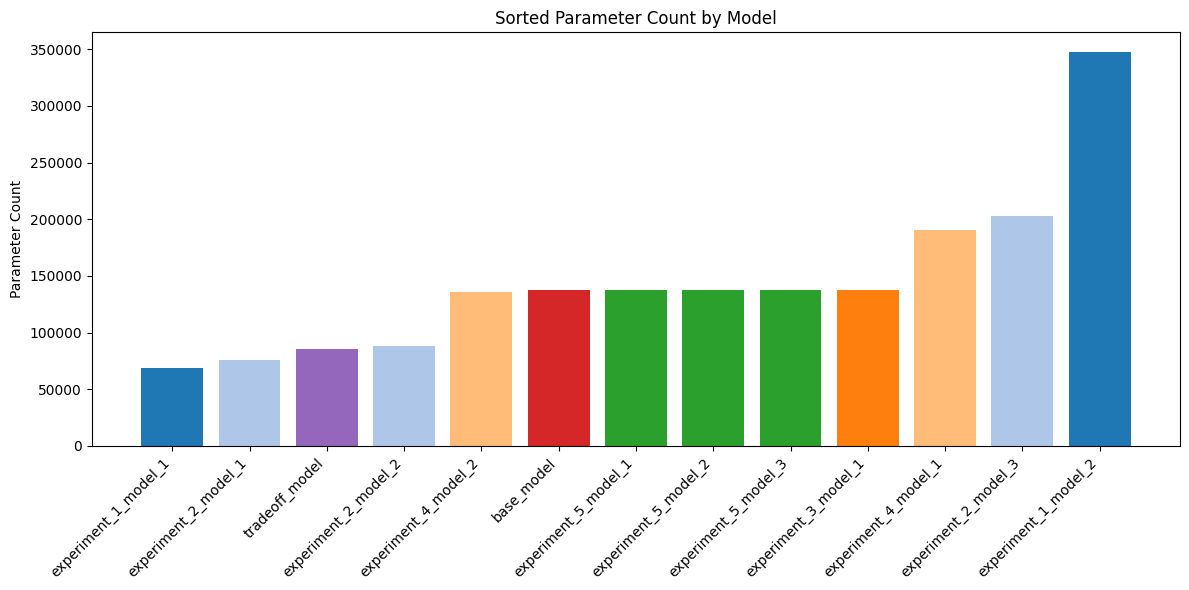

In [22]:
# 📈 Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(model_names, param_counts, color=bar_colors)

# Format plot
plt.ylabel('Parameter Count')
plt.title('Sorted Parameter Count by Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save plot
plt.savefig('/content/CAE-MNIST/outputs/final_results_files/all_param_counts_image.png')
plt.show()

In [23]:
# Push the bar chart image to GitHub
!git -C /content/CAE-MNIST add outputs/final_results_files/all_param_counts_image.png
!git -C /content/CAE-MNIST commit -m "Created bar plot image of all modeld param counts"
!git -C /content/CAE-MNIST push origin main

[main ec36ae4] Created bar plot image of all modeld param counts
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 outputs/final_results_files/all_param_counts_image.png
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 31.09 KiB | 15.54 MiB/s, done.
Total 5 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/vlad-uve/CAE-MNIST.git
   42ec106..ec36ae4  main -> main
